In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
data = pd.read_csv('homicide-data.csv', encoding='unicode_escape')

# Preparación de los datos

In [3]:
data.head(10)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest
5,Alb-000006,20100126,BOOK,GERALDINE,White,91,Female,Albuquerque,NM,35.151110,-106.537797,Open/No arrest
6,Alb-000007,20100127,MALDONADO,DAVID,Hispanic,52,Male,Albuquerque,NM,35.111785,-106.712614,Closed by arrest
7,Alb-000008,20100127,MALDONADO,CONNIE,Hispanic,52,Female,Albuquerque,NM,35.111785,-106.712614,Closed by arrest
8,Alb-000009,20100130,MARTIN-LEYVA,GUSTAVO,White,56,Male,Albuquerque,NM,35.075380,-106.553458,Open/No arrest
9,Alb-000010,20100210,HERRERA,ISRAEL,Hispanic,43,Male,Albuquerque,NM,35.065930,-106.572288,Open/No arrest


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            52179 non-null  object 
 1   reported_date  52179 non-null  int64  
 2   victim_last    52178 non-null  object 
 3   victim_first   52179 non-null  object 
 4   victim_race    52179 non-null  object 
 5   victim_age     52179 non-null  object 
 6   victim_sex     52179 non-null  object 
 7   city           52179 non-null  object 
 8   state          52179 non-null  object 
 9   lat            52119 non-null  float64
 10  lon            52119 non-null  float64
 11  disposition    52179 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


In [5]:
data = data.drop(['uid', 'victim_last', 'victim_first'], axis=1)

In [6]:
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,20100216,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,20100601,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,20100101,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,20100102,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In [7]:
data['victim_race'].value_counts()

victim_race
Black       33361
Hispanic     6901
White        6333
Unknown      4199
Other         700
Asian         685
Name: count, dtype: int64

In [8]:
dummies = pd.get_dummies(data['victim_race'], dtype=int)
dummies

,Asian,Black,Hispanic,Other,Unknown,White
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
52174,0,1,0,0,0,0
52175,0,1,0,0,0,0
52176,0,1,0,0,0,0
52177,0,1,0,0,0,0


In [9]:
data = data.join(dummies)
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,Asian,Black,Hispanic,Other,Unknown,White
0,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,0,0,1,0,0,0
1,20100216,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,0,0,1,0,0,0
2,20100601,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,0,0,0,0,0,1
3,20100101,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,0,0,1,0,0,0
4,20100102,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,0,0,0,0,0,1


In [10]:
dummies = pd.get_dummies(data['victim_sex'], dtype=int)
dummies

,Female,Male,Unknown
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
52174,0,1,0
52175,0,1,0
52176,0,1,0
52177,0,1,0


In [11]:
data['Unknown_Race'] = data['Unknown']
data = data.drop(['Unknown'], axis=1)

In [12]:

data = data.join(dummies)
data['Unknown_Sex'] = data['Unknown']
data = data.drop(['Unknown'], axis=1)
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,Asian,Black,Hispanic,Other,White,Unknown_Race,Female,Male,Unknown_Sex
0,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,0,0,1,0,0,0,0,1,0
1,20100216,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,0,0,1,0,0,0,0,1,0
2,20100601,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,0,0,0,0,1,0,1,0,0
3,20100101,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,0,0,1,0,0,0,0,1,0
4,20100102,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,0,0,0,0,1,0,1,0,0


In [13]:
dummies = pd.get_dummies(data['disposition'], dtype=int)
data = data.join(dummies)
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,Asian,...,Hispanic,Other,White,Unknown_Race,Female,Male,Unknown_Sex,Closed by arrest,Closed without arrest,Open/No arrest
0,20100504,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,0,...,1,0,0,0,0,1,0,0,1,0
1,20100216,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,0,...,1,0,0,0,0,1,0,1,0,0
2,20100601,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,0,...,0,0,1,0,1,0,0,0,1,0
3,20100101,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,0,...,1,0,0,0,0,1,0,1,0,0
4,20100102,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,0,...,0,0,1,0,1,0,0,0,1,0


Pasamos las fechas a formato fecha

In [14]:
data.loc[:,'reported_date'].map(lambda date: len(str(date))).value_counts() 

reported_date
8    52177
9        2
Name: count, dtype: int64

In [15]:
data[data.loc[:,'reported_date'].map(lambda date: len(str(date)))>8].index

Index([33584, 33587], dtype='int64')

In [16]:
data.iloc[33586] # 201511105
data['reported_date']=data['reported_date'].replace(201511105, 20151105)

In [17]:
data.iloc[33584] # 20151014
data['reported_date'] = data['reported_date'].replace(201511018, 20151018)

In [18]:
data['reported_date'] = pd.to_datetime(data.loc[:,'reported_date'].map(lambda date: str(date)[:4]+'-'+str(date)[4:6]+'-'+str(date)[6:]))


In [19]:
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,Asian,...,Hispanic,Other,White,Unknown_Race,Female,Male,Unknown_Sex,Closed by arrest,Closed without arrest,Open/No arrest
0,2010-05-04,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,0,...,1,0,0,0,0,1,0,0,1,0
1,2010-02-16,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,0,...,1,0,0,0,0,1,0,1,0,0
2,2010-06-01,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,0,...,0,0,1,0,1,0,0,0,1,0
3,2010-01-01,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,0,...,1,0,0,0,0,1,0,1,0,0
4,2010-01-02,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,0,...,0,0,1,0,1,0,0,0,1,0


In [20]:
data['month'] = data['reported_date'].dt.month
data['year'] = data['reported_date'].dt.year
data['day'] = data['reported_date'].dt.day

Remplazamos los valores no conocidos de la edad con el valor promedio de la edad y el nuevo dataframe lo llamamos data_ns

In [21]:
data_ns = data.drop(['victim_race', 'victim_sex', 'city', 'state', 'disposition'], axis=1)
age = int(data_ns[data_ns['victim_age']!='Unknown']['victim_age'].map(lambda x: int(x)).mean())
data_ns['victim_age'] = data_ns['victim_age'].replace('Unknown', age)
data_ns['victim_age'] = data_ns['victim_age'].map(lambda x: int(x))
data_ns['victim_age'] = data_ns['victim_age'].astype('int32')

# Graficas

array([[<Axes: title={'center': 'reported_date'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'Asian'}>],
       [<Axes: title={'center': 'Black'}>,
        <Axes: title={'center': 'Hispanic'}>,
        <Axes: title={'center': 'Other'}>,
        <Axes: title={'center': 'White'}>],
       [<Axes: title={'center': 'Unknown_Race'}>,
        <Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Unknown_Sex'}>],
       [<Axes: title={'center': 'Closed by arrest'}>,
        <Axes: title={'center': 'Closed without arrest'}>,
        <Axes: title={'center': 'Open/No arrest'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'day'}>, <Axes: >, <Axes: >]],
      dtype=object)

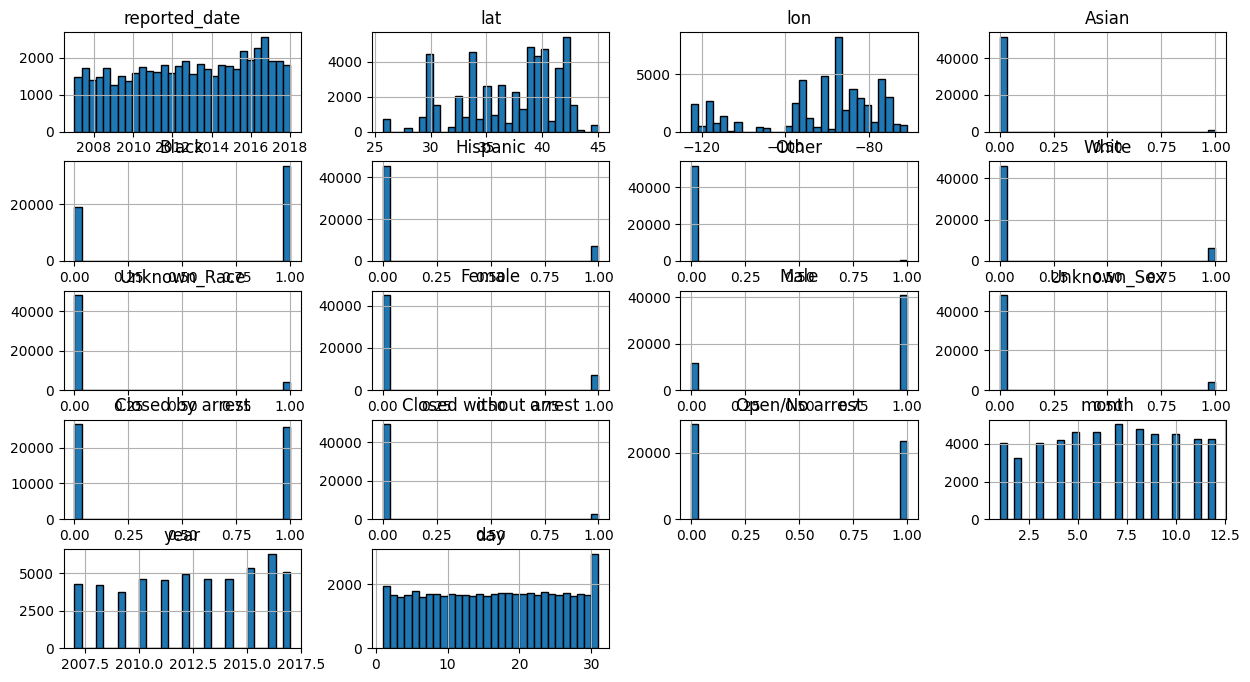

In [22]:
data.hist(figsize=(15, 8), bins=30, edgecolor='black')

In [23]:
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,Asian,...,Unknown_Race,Female,Male,Unknown_Sex,Closed by arrest,Closed without arrest,Open/No arrest,month,year,day
0,2010-05-04,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,0,...,0,0,1,0,0,1,0,5,2010,4
1,2010-02-16,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,0,...,0,0,1,0,1,0,0,2,2010,16
2,2010-06-01,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,0,...,0,1,0,0,0,1,0,6,2010,1
3,2010-01-01,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,0,...,0,0,1,0,1,0,0,1,2010,1
4,2010-01-02,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,0,...,0,1,0,0,0,1,0,1,2010,2


C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='victim_sex', ylabel='count'>

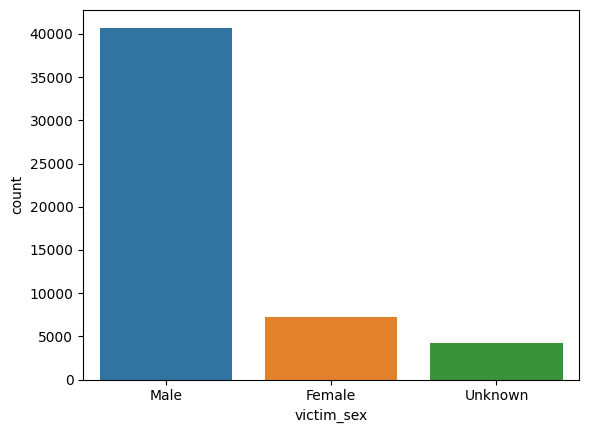

In [24]:
sb.countplot(x='victim_sex', data=data)

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='victim_race', ylabel='count'>

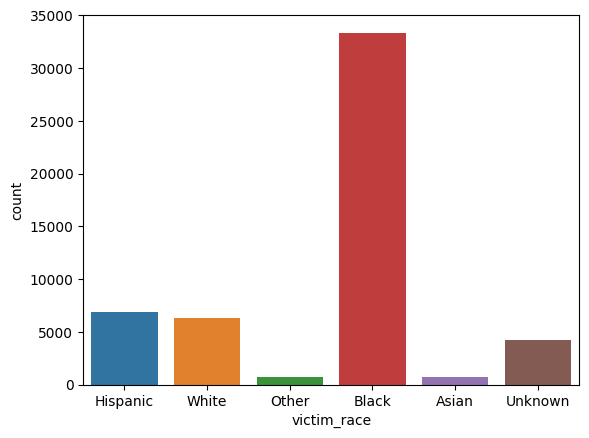

In [25]:
sb.countplot(x='victim_race', data=data)

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='disposition', ylabel='count'>

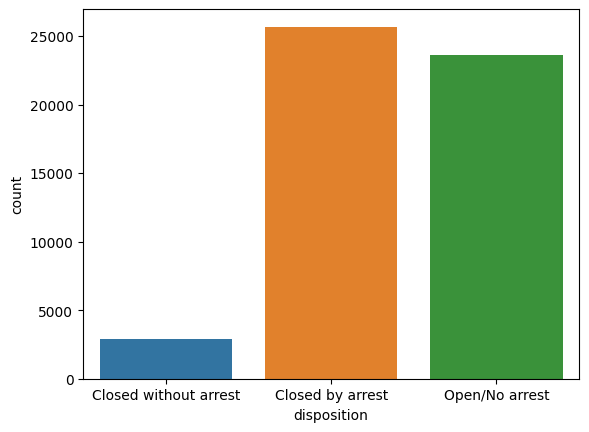

In [26]:
sb.countplot(x='disposition', data=data)

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

<Axes: xlabel='month', ylabel='count'>

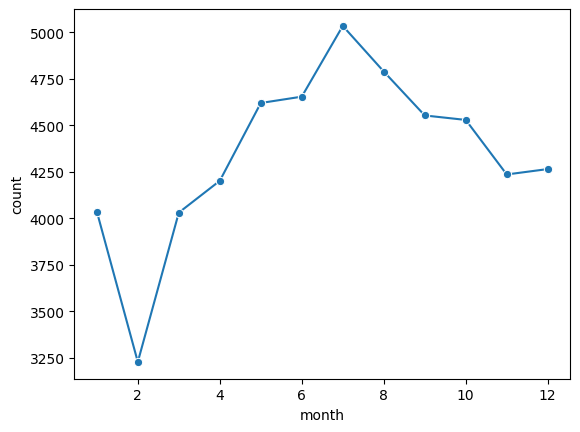

In [27]:
sb.lineplot(data=data['month'].value_counts(), marker='o')


C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='victim_age'>

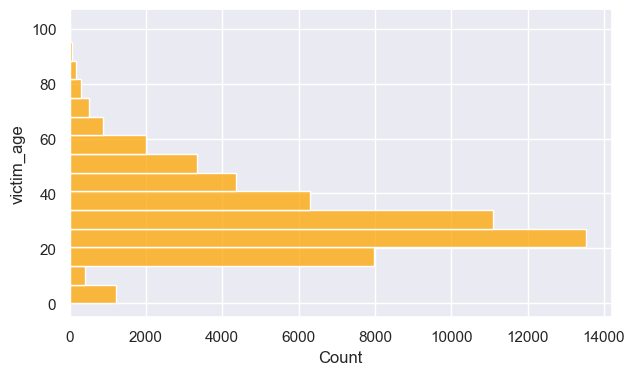

In [28]:
sb.set(rc = {'figure.figsize':(7,4)})
# sb.histplot(data=data_ns.join(data['victim_sex']), x='victim_age', bins=15, hue='victim_sex',multiple="dodge")
sb.histplot(data=data_ns, y='victim_age', bins=15, color='orange')

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='year', ylabel='count'>

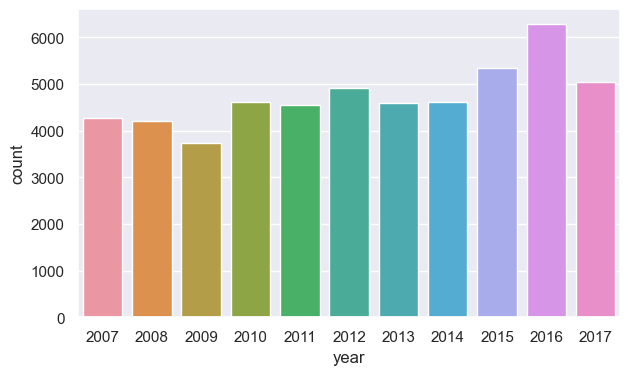

In [29]:
sb.set(rc = {'figure.figsize':(7,4)})
sb.countplot(x='year', data=data)

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

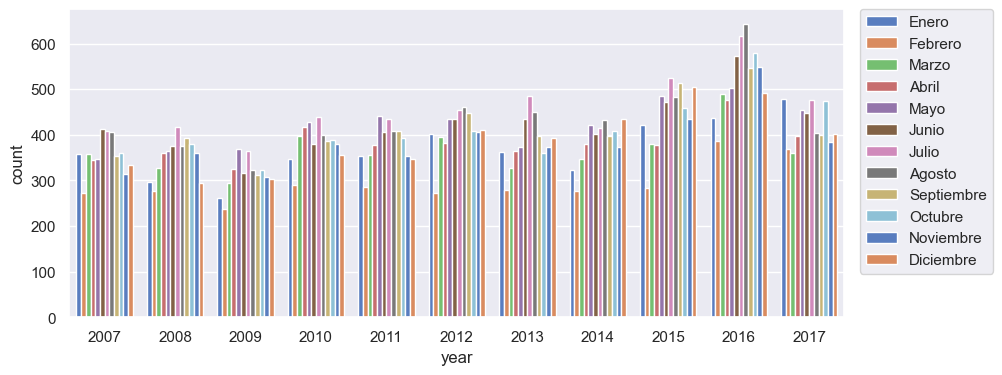

In [30]:
plt.figure(figsize = (10,4))
ax = sb.countplot(x='year', data=data, hue = 'month', palette='muted')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, 
           labels =['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
           )



C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

[Text(0, 0, 'Enero'),
 Text(1, 0, 'Febrero'),
 Text(2, 0, 'Marzo'),
 Text(3, 0, 'Abril'),
 Text(4, 0, 'Mayo'),
 Text(5, 0, 'Junio'),
 Text(6, 0, 'Julio'),
 Text(7, 0, 'Agosto'),
 Text(8, 0, 'Septiembre'),
 Text(9, 0, 'Octubre'),
 Text(10, 0, 'Noviembre'),
 Text(11, 0, 'Diciembre')]

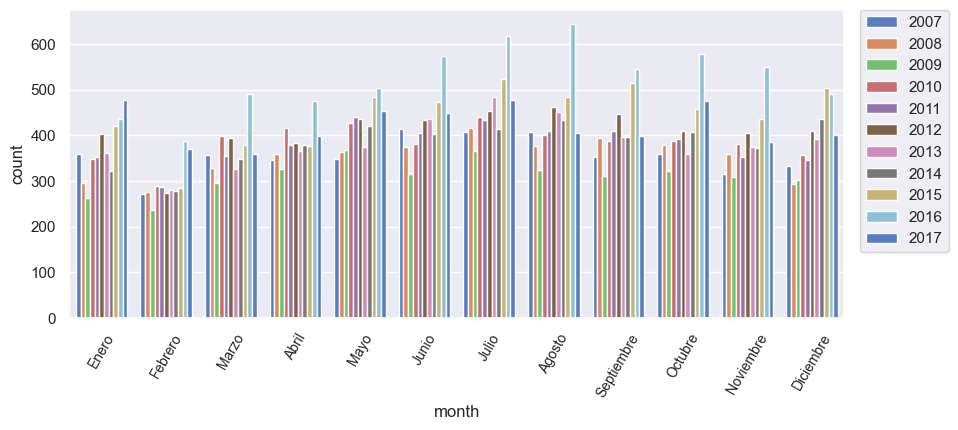

In [31]:
plt.figure(figsize = (10,4))
ax = sb.countplot(x='month', data=data,hue='year',  palette='muted')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, 
           )
ax.set(xticklabels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, fontsize=10)


In [32]:
# fig, axes = plt.subplots(nrows=2, ncols=6, sharey=True, figsize=(16,9))


# d1 = data[data['year'] == 2007][['year', 'month']].groupby(['month']).sum().plot(ax=axes[0,0], kind='line')
# d2 = data[data['year'] == 2008][['year', 'month']].groupby(['month']).sum().plot(ax=axes[0,1], kind='line')
# d3 = data[data['year'] == 2009][['year', 'month']].groupby(['month']).sum().plot(ax=axes[0,2], kind='line')
# d4 = data[data['year'] == 2010][['year', 'month']].groupby(['month']).sum().plot(ax=axes[0,3], kind='line')
# d5 = data[data['year'] == 2011][['year', 'month']].groupby(['month']).sum().plot(ax=axes[0,4], kind='line')
# d6 = data[data['year'] == 2012][['year', 'month']].groupby(['month']).sum().plot(ax=axes[0,5], kind='line')
# d7 = data[data['year'] == 2013][['year', 'month']].groupby(['month']).sum().plot(ax=axes[1,0], kind='line')
# d8 = data[data['year'] == 2014][['year', 'month']].groupby(['month']).sum().plot(ax=axes[1,1], kind='line')
# d9 = data[data['year'] == 2015][['year', 'month']].groupby(['month']).sum().plot(ax=axes[1,2], kind='line')
# d10= data[data['year'] == 2016][['year', 'month']].groupby(['month']).sum().plot(ax=axes[1,3], kind='line')
# d11= data[data['year'] == 2017][['year', 'month']].groupby(['month']).sum().plot(ax=axes[1,4], kind='line') 

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='victim_sex', ylabel='count'>

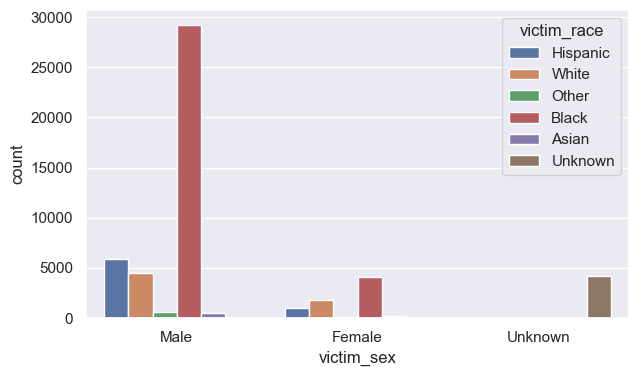

In [33]:
sb.countplot(x='victim_sex', data=data, hue='victim_race')

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

[Text(0, 0, 'NM'),
 Text(1, 0, 'GA'),
 Text(2, 0, 'MD'),
 Text(3, 0, 'LA'),
 Text(4, 0, 'AL'),
 Text(5, 0, 'MA'),
 Text(6, 0, 'NY'),
 Text(7, 0, 'NC'),
 Text(8, 0, 'IL'),
 Text(9, 0, 'OH'),
 Text(10, 0, 'TX'),
 Text(11, 0, 'CO'),
 Text(12, 0, 'MI'),
 Text(13, 0, 'CA'),
 Text(14, 0, 'IN'),
 Text(15, 0, 'FL'),
 Text(16, 0, 'MO'),
 Text(17, 0, 'NV'),
 Text(18, 0, 'KY'),
 Text(19, 0, 'TN'),
 Text(20, 0, 'wI'),
 Text(21, 0, 'MN'),
 Text(22, 0, 'OK'),
 Text(23, 0, 'NE'),
 Text(24, 0, 'PA'),
 Text(25, 0, 'AZ'),
 Text(26, 0, 'VA'),
 Text(27, 0, 'DC')]

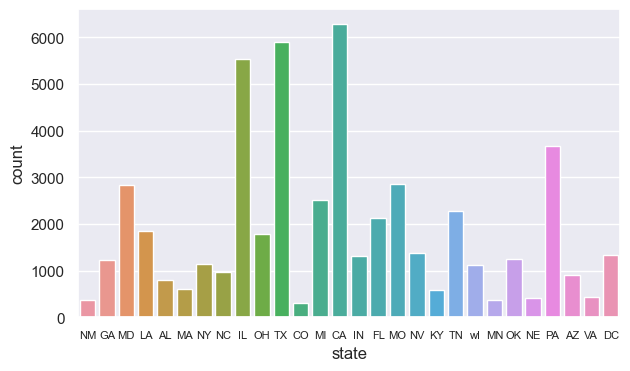

In [34]:
plt.figure(figsize = (7,4))
ax = sb.countplot(x='state', data=data)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

[Text(0, 0, 'Albuquerque'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'Baltimore'),
 Text(3, 0, 'Baton Rouge'),
 Text(4, 0, 'Birmingham'),
 Text(5, 0, 'Boston'),
 Text(6, 0, 'Buffalo'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'Cincinnati'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'Dallas'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'Durham'),
 Text(15, 0, 'Fort Worth'),
 Text(16, 0, 'Fresno'),
 Text(17, 0, 'Houston'),
 Text(18, 0, 'Indianapolis'),
 Text(19, 0, 'Jacksonville'),
 Text(20, 0, 'Kansas City'),
 Text(21, 0, 'Las Vegas'),
 Text(22, 0, 'Long Beach'),
 Text(23, 0, 'Los Angeles'),
 Text(24, 0, 'Louisville'),
 Text(25, 0, 'Memphis'),
 Text(26, 0, 'Miami'),
 Text(27, 0, 'Milwaukee'),
 Text(28, 0, 'Minneapolis'),
 Text(29, 0, 'Nashville'),
 Text(30, 0, 'New Orleans'),
 Text(31, 0, 'New York'),
 Text(32, 0, 'Oakland'),
 Text(33, 0, 'Oklahoma City'),
 Text(34, 0, 'Omaha'),
 Text(35, 0, 'Philadelphia'),
 Text(36, 0, 'Phoenix'),
 Text(37, 0, 'Pittsbur

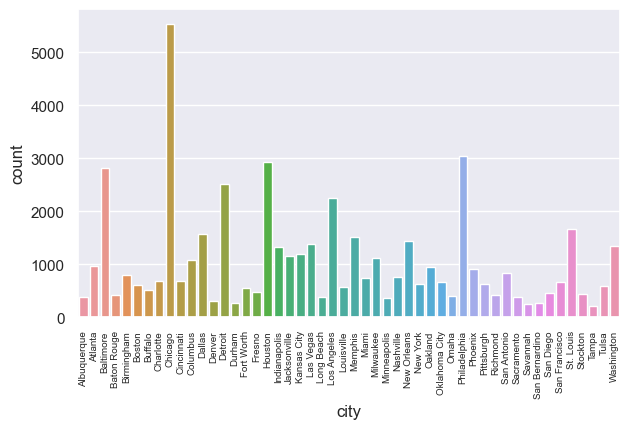

In [35]:
plt.figure(figsize = (7,4))
ax = sb.countplot(x='city', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=7)

In [189]:
data['city'].value_counts().sort_values()

city
Tampa              208
Savannah           246
San Bernardino     275
Durham             276
Denver             312
Minneapolis        366
Sacramento         376
Long Beach         378
Albuquerque        378
Omaha              409
Baton Rouge        424
Richmond           429
Stockton           444
San Diego          461
Fresno             487
Buffalo            521
Fort Worth         549
Louisville         576
Tulsa              584
Boston             614
New York           627
Pittsburgh         631
San Francisco      663
Oklahoma City      672
Charlotte          687
Cincinnati         694
Miami              744
Nashville          767
Birmingham         800
San Antonio        833
Phoenix            914
Oakland            947
Atlanta            973
Columbus          1084
Milwaukee         1115
Jacksonville      1168
Kansas City       1190
Indianapolis      1322
Washington        1345
Las Vegas         1381
New Orleans       1434
Memphis           1514
Dallas            1567
St. Lo

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='victim_race', ylabel='count'>

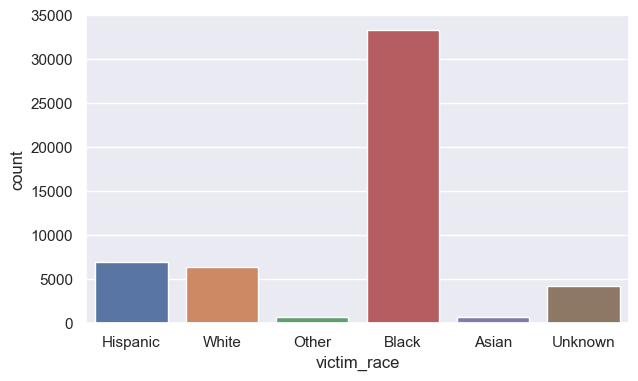

In [191]:
sb.set(rc = {'figure.figsize':(7,4)})
sb.countplot(x='victim_race', data=data,)

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='disposition', ylabel='count'>

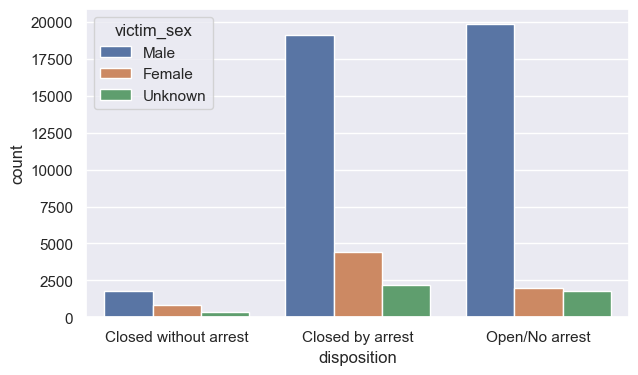

In [36]:
sb.set(rc = {'figure.figsize':(7,4)})
sb.countplot(x='disposition', data=data, hue='victim_sex')

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2k

<Axes: xlabel='disposition', ylabel='count'>

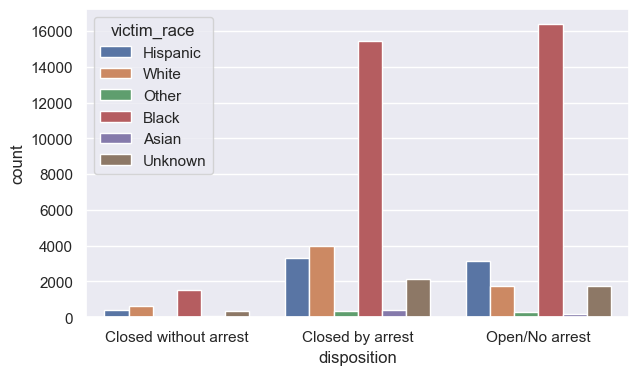

In [190]:
sb.set(rc = {'figure.figsize':(7,4)})
sb.countplot(x='disposition', data=data, hue='victim_race')

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\yamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2k

<Axes: xlabel='victim_race', ylabel='count'>

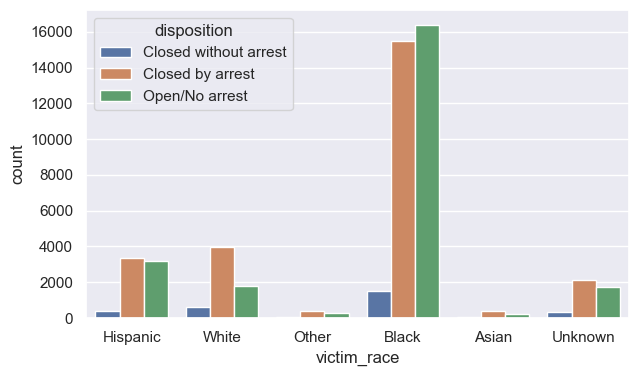

In [186]:
sb.set(rc = {'figure.figsize':(7,4)})
sb.countplot(hue='disposition', data=data, x='victim_race')

In [37]:
fig = px.scatter_geo(data, lat='lat', lon='lon', scope="usa")
fig.show()

In [38]:
df = data['state'].value_counts().to_frame()
fig = px.choropleth(
    locations=df.index, color=df['count'], locationmode="USA-states", scope="usa", color_continuous_scale='OrRd', title='Mapa de numero de asesitatos',
     labels={'color':'Número de asesinatos'}
    )
fig.show()

In [39]:
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,Asian,...,Unknown_Race,Female,Male,Unknown_Sex,Closed by arrest,Closed without arrest,Open/No arrest,month,year,day
0,2010-05-04,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,0,...,0,0,1,0,0,1,0,5,2010,4
1,2010-02-16,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,0,...,0,0,1,0,1,0,0,2,2010,16
2,2010-06-01,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,0,...,0,1,0,0,0,1,0,6,2010,1
3,2010-01-01,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,0,...,0,0,1,0,1,0,0,1,2010,1
4,2010-01-02,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,0,...,0,1,0,0,0,1,0,1,2010,2


# Entrenando el modelo

In [40]:
data.head()

,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,Asian,...,Unknown_Race,Female,Male,Unknown_Sex,Closed by arrest,Closed without arrest,Open/No arrest,month,year,day
0,2010-05-04,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,0,...,0,0,1,0,0,1,0,5,2010,4
1,2010-02-16,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,0,...,0,0,1,0,1,0,0,2,2010,16
2,2010-06-01,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,0,...,0,1,0,0,0,1,0,6,2010,1
3,2010-01-01,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,0,...,0,0,1,0,1,0,0,1,2010,1
4,2010-01-02,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,0,...,0,1,0,0,0,1,0,1,2010,2


In [41]:
data_ns.head()

,reported_date,victim_age,lat,lon,Asian,Black,Hispanic,Other,White,Unknown_Race,Female,Male,Unknown_Sex,Closed by arrest,Closed without arrest,Open/No arrest,month,year,day
0,2010-05-04,78,35.095788,-106.538555,0,0,1,0,0,0,0,1,0,0,1,0,5,2010,4
1,2010-02-16,17,35.056810,-106.715321,0,0,1,0,0,0,0,1,0,1,0,0,2,2010,16
2,2010-06-01,15,35.086092,-106.695568,0,0,0,0,1,0,1,0,0,0,1,0,6,2010,1
3,2010-01-01,32,35.078493,-106.556094,0,0,1,0,0,0,0,1,0,1,0,0,1,2010,1
4,2010-01-02,72,35.130357,-106.580986,0,0,0,0,1,0,1,0,0,0,1,0,1,2010,2


<Axes: >

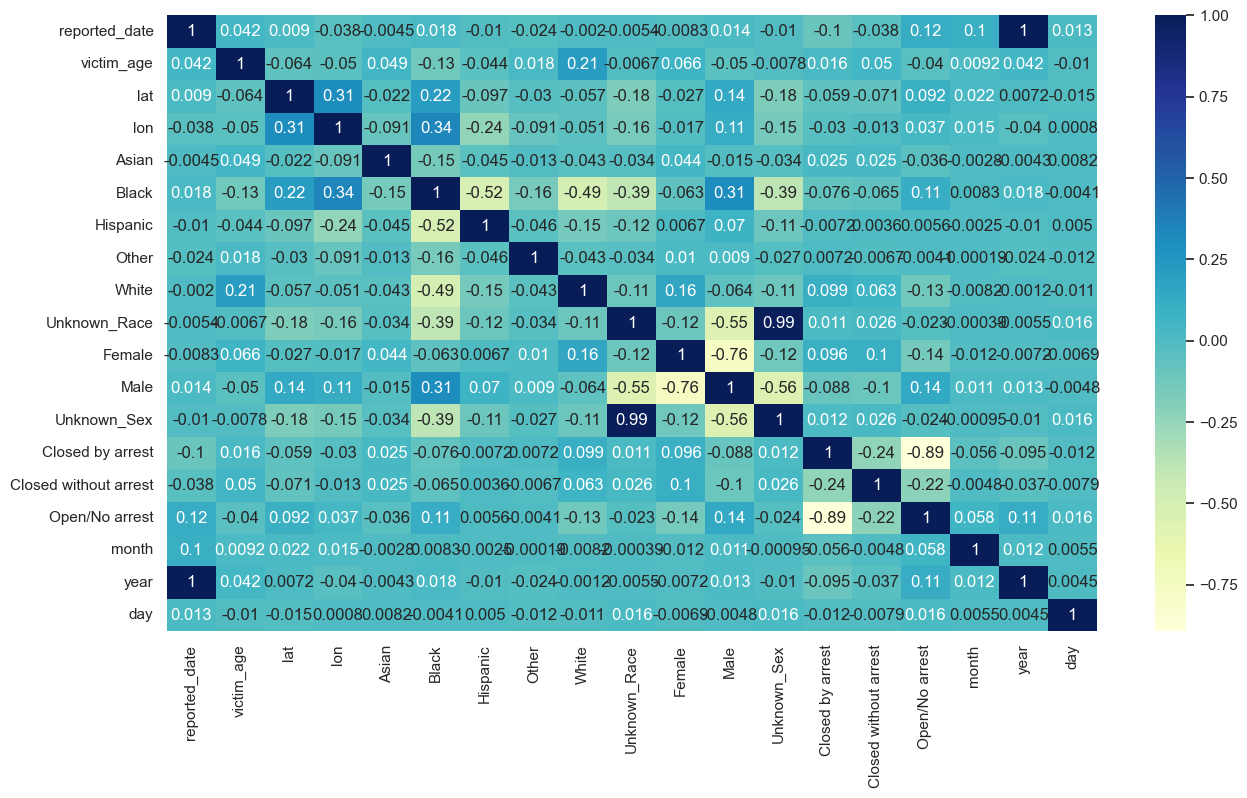

In [42]:
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(data_ns.corr(), annot=True, cmap='YlGnBu')

In [125]:
data_ns.head()

,reported_date,victim_age,lat,lon,Asian,Black,Hispanic,Other,White,Unknown_Race,Female,Male,Unknown_Sex,Closed by arrest,Closed without arrest,Open/No arrest,month,year,day
0,2010-05-04,78,35.095788,-106.538555,0,0,1,0,0,0,0,1,0,0,1,0,5,2010,4
1,2010-02-16,17,35.056810,-106.715321,0,0,1,0,0,0,0,1,0,1,0,0,2,2010,16
2,2010-06-01,15,35.086092,-106.695568,0,0,0,0,1,0,1,0,0,0,1,0,6,2010,1
3,2010-01-01,32,35.078493,-106.556094,0,0,1,0,0,0,0,1,0,1,0,0,1,2010,1
4,2010-01-02,72,35.130357,-106.580986,0,0,0,0,1,0,1,0,0,0,1,0,1,2010,2


## Random Forest

In [143]:
# Separar las características de la etiqueta
X = data_ns.dropna()
y = X[['Closed by arrest', 'Closed without arrest', 'Open/No arrest']]
X = X.drop(['Closed by arrest', 'Closed without arrest', 'Open/No arrest', 'reported_date', 'lat', 'lon', 'reported_date', 'month', 'year', 'day', 'Unknown_Sex', 'Unknown_Race', 'Other'] , axis=1)
X.isna().value_counts()

victim_age  Asian  Black  Hispanic  White  Female  Male 
False       False  False  False     False  False   False    52119
Name: count, dtype: int64

In [144]:
X.head()

,victim_age,Asian,Black,Hispanic,White,Female,Male
0,78,0,0,1,0,0,1
1,17,0,0,1,0,0,1
2,15,0,0,0,1,1,0
3,32,0,0,1,0,0,1
4,72,0,0,0,1,1,0


In [145]:
# Separar los datos en dos partes: Conjunto de entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2)

In [149]:
from sklearn.ensemble import RandomForestClassifier

# Crear y ajustar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=150)
model.fit(X_ent, y_ent)  

RandomForestClassifier(n_estimators=150)

In [150]:
predicciones = model.predict(X_pru)

In [151]:

print(model.score(X_pru, y_pru))

0.4797582501918649


## Regresión Logística

In [156]:
# Separar las características de la etiqueta
X = data_ns.join(data['disposition']).dropna()
y = X['disposition']
X = X.drop(['Closed by arrest', 'Closed without arrest', 
            'Open/No arrest', 'reported_date', 'disposition', 
            'lat', 'lon', 'reported_date', 'month', 'year', 'day',
            'Other', 'Unknown_Race', 'Unknown_Sex', 'victim_age'], axis=1)
X.isna().value_counts()

Asian  Black  Hispanic  White  Female  Male 
False  False  False     False  False   False    52119
Name: count, dtype: int64

In [157]:
# Separar los datos en dos partes: Conjunto de entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2)

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_ent_scaled = scaler.fit_transform(X_ent)
X_pru_scaled = scaler.fit_transform(X_pru)

In [160]:
from sklearn.linear_model import LogisticRegression

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_ent_scaled, y_ent)  
predicciones = model.predict(X_pru_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.5302187260168841

## Red neuronal de clasificación

In [173]:
X = data_ns.dropna()
y = X[['Closed by arrest', 'Closed without arrest', 'Open/No arrest']]
X = X.drop(['Closed by arrest', 'Closed without arrest', 'Open/No arrest', 'reported_date', 'lat', 
            'lon', 'Other', 'Unknown_Race', 'Unknown_Sex', 'month',  'year',   'day'], axis=1)
X.isna().value_counts()

victim_age  Asian  Black  Hispanic  White  Female  Male 
False       False  False  False     False  False   False    52119
Name: count, dtype: int64

In [164]:
X_ent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41695 entries, 37129 to 23331
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Asian     41695 non-null  int32
 1   Black     41695 non-null  int32
 2   Hispanic  41695 non-null  int32
 3   White     41695 non-null  int32
 4   Female    41695 non-null  int32
 5   Male      41695 non-null  int32
dtypes: int32(6)
memory usage: 1.3 MB


In [174]:
# Separar los datos en dos partes: Conjunto de entrenamiento y uno de pruebas
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2)

In [175]:
import tensorflow as tf

In [180]:
modelo = tf.keras.Sequential([
    # Capa de entrada
    tf.keras.layers.Dense(6, input_shape=(7,)),
    # Capa oculta
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(15, activation=tf.nn.relu),
    # Capa de salida
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics= ['accuracy']
)

In [181]:
entrenamiento = modelo.fit(X_ent, y_ent, epochs=25, batch_size=32)

Epoch 1/25
1303/1303 [==============================] - 6s 2ms/step - loss: 0.9260 - accuracy: 0.5256
Epoch 2/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8524 - accuracy: 0.5378
Epoch 3/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8496 - accuracy: 0.5385
Epoch 4/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8483 - accuracy: 0.5392
Epoch 5/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8460 - accuracy: 0.5422
Epoch 6/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8458 - accuracy: 0.5444
Epoch 7/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8446 - accuracy: 0.5459
Epoch 8/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8439 - accuracy: 0.5476
Epoch 9/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.8438 - accuracy: 0.5452
Epoch 10/25
1303/1303 [==============================] - 3s 2ms/step - loss: 0.843

# Conclusiones

De las gráficas podemos concluir que la gente negra sufre de asesinatos mayormente que las otras razas,por otro lado la gente asiatica/otros es la que sufre menos asesinatos. Asimismo los hombres son mayormente asesinados. También se observa que en la gran mayoría los casos son cerrados con arresto o siguen abiertos por lo que no es tan común que los casos se cierren sin arresto. Además el rango de edad en la que la gente es más asesinada es de 20 a 50 años. El número de asesinatos no aumentó mucho sin embargo 2016 fue el año con la mayor cantidad de asesinatos además se observa un aumento lento.  

La ciudad de Chicago fue la ciudad con mayor número de asesinatos con 5535 muetras ientras que Tampa tuvo 208, así pues Tampa es la ciudad con menos índice de asesinatos seguida de Savannah, San Bernardino y Durham  con 246, 275 y 276 respectivamente.

Sobre el modelo para predecir la conclusión de los casos. Se observa que en todos los modelos se tiene una precisión cerca del 50%, esto era de esperarse pues que el caso sea cerrado con arresto o esté abierto sin arresto tienen números muy similares y la conclusión del caso es muy subjetiva, por lo que estos modelos no tienen una exactitud confiable.